In [378]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [379]:
companies=pd.read_csv('C:/krh/dev/python/ml/datsets/companies.csv')
x=companies.iloc[:,:-1].values
y=companies.iloc[:,4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

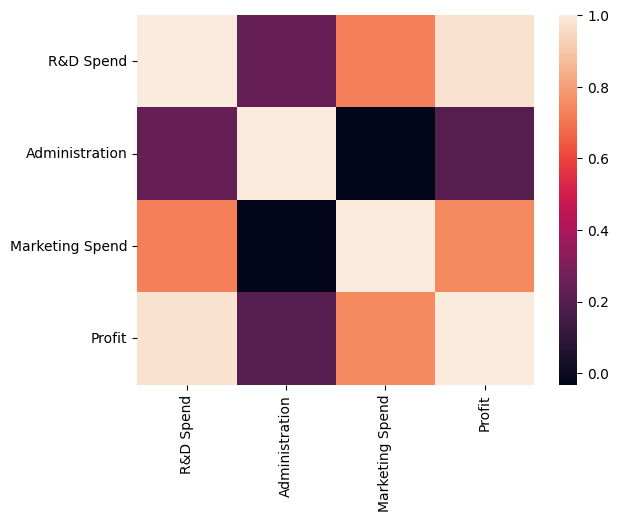

In [380]:
sns.heatmap(companies.corr(numeric_only=True))

In [381]:
#encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder=LabelEncoder()
#x[:,3]=labelencoder.fit_transform(x[:,3])
#onehotencoder=OneHotEncoder(categorical_features=[3])
#x=onehotencoder.fit_transform(x).toarray()
#x

In [382]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_index=companies.columns.get_loc('State')
columntransformer=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[column_index])],remainder='passthrough')
x=np.array(columntransformer.fit_transform(x))
x


array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [383]:
# avoiding dummy variables trap
#x=x[:,1:]
#x

In [384]:
#splitting the dataset into the training set and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [385]:
#fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
modelFit=LinearRegression()
modelFit.fit(x_train,y_train)

LinearRegression()

In [386]:
y_pred=modelFit.predict(x_test)
y_pred

array([103015.20159796, 132582.27760815, 132447.73845174,  71976.09851258,
       178537.48221056, 116161.24230167,  67851.69209676,  98791.73374687,
       113969.43533014, 167921.06569551])

In [388]:
# calculating the coefficients and the intercept
#modelFit.coef_
modelFit.intercept_

np.float64(42467.5292485298)

In [389]:
# evaluating the model 
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.934706847328201

<Axes: xlabel='R&D Spend', ylabel='Profit'>

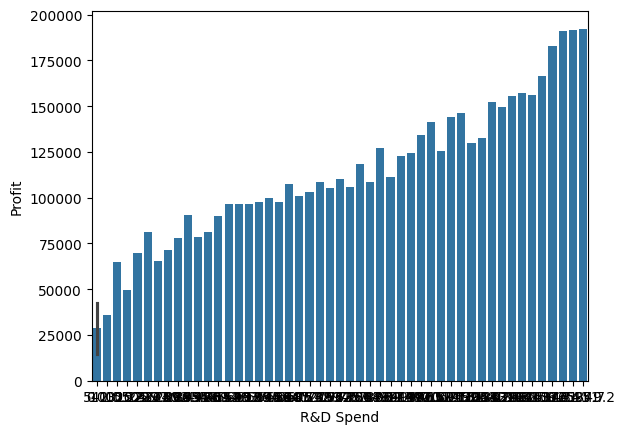

In [405]:

sns.barplot(data=companies,x=companies['R&D Spend'],y=companies['Profit'])
